# Numerical tests

We present some numerical tests. First, some details about the problem and the numerical method are provided.

## 1. Partial differential equation
We will focus on the problem
$$
\Delta u  = 0 \quad \text{in }\Omega
$$
with Dirichlet boundary conditions
$$
u = 0 \quad \text{on }\Gamma_{top}, \quad u = 1 \quad \text{on }\Gamma_{bot}
$$
and periodic boundary conditions
$$
u(0,y)=u(1,y),\;\partial_{x} u(0,y)=\partial_{x}u(1,y) \quad 0\leq y\leq 1
$$
The domain $\Omega$ is defined by
$$
\Omega = \left\{(x,y)\mid 0 \leq x \leq 1,\;0 \leq y \leq \eta(x) \right\}
$$
where $\eta$ is a function such that $\eta(0)=\eta(1)=1$ and $\eta^\prime(0)=\eta^\prime(1)$.
The general problem can be reduced to this problem after a **change of variables**.

## 2. Representation of the top boundary

The top boundary is represented by a curve of the form
$$
\eta\left(x,t\right)=a_{-1}\left(t\right)\phi_{-1}\left(x\right)+\sum_{i=0}^{N-1}a_{i}\left(t\right)\phi_{i}\left(x\right)+a_{N}\left(t\right)\phi_{N}\left(x\right)
$$
where $\phi_i$ are piecewise linear basis functions.
Thus, the domains is
$$
\Omega_{t}=\left\{ \left(x,y\right)\mid0\leq x\leq1,\,0\leq y\leq\eta\left(x,t\right)\right\} 
$$

Applying the boundary conditions
$$
\eta\left(0,t\right)=\eta\left(1,t\right),\quad\partial_{x}\eta\left(0,t\right)=\partial_{x}\eta\left(1,t\right)
$$
we obtain that
$$
\eta\left(x,t\right)=\sum_{i=0}^{N-1}\left(\alpha_{i}\phi_{-1}\left(x\right)+\phi_{i}\left(x\right)+\beta_{i}\phi_{N}\left(x\right)\right)a_{i}\left(t\right)
$$

with $\alpha$ and $\beta$ given by
$$
\alpha=\frac{1}{d}\left(\left(\phi_{N}\left(1\right)-\phi_{N}\left(0\right)\right)B-\left(\phi_{N}^{\prime}\left(1\right)-\phi_{N}^{\prime}\left(0\right)\right)A\right)
$$
$$
\beta =\frac{1}{d}\left(\left(\phi_{-1}^{\prime}\left(1\right)-\phi_{-1}^{\prime}\left(0\right)\right)A-\left(\phi_{-1}\left(1\right)-\phi_{-1}\left(0\right)\right)B\right)
$$

where
$$
d =\det\left(\begin{array}{cc}
\phi_{-1}\left(1\right)-\phi_{-1}\left(0\right) & \phi_{N}\left(1\right)-\phi_{N}\left(0\right)\\
\phi_{-1}^{\prime}\left(1\right)-\phi_{-1}^{\prime}\left(0\right) & \phi_{N}^{\prime}\left(1\right)-\phi_{N}^{\prime}\left(0\right)
\end{array}\right)
$$
$$
A =\left(\phi_{i}\left(1\right)-\phi_{i}\left(0\right)\right)_{i=0}^{N-1}
$$
$$
B = \left(\phi_{i}^{\prime}\left(1\right)-\phi_{i}^{\prime}\left(0\right)\right)_{i=0}^{N-1}
$$

We also consider the representation
$$
\eta\left(x,t\right)=\psi\left(t\right)+\sum_{i=0}^{N-1}\phi_{i}\left(x,t\right)
$$
where $\psi$ is a positive function and $\phi_i$ is a periodic function.

## 3. Parametrization of the domain

Writting $a_{i}\left(t\right)=\lambda_{i}+t\delta\lambda_{i}$ in the piecewise linear representation of $\eta$, the domain $\Omega_t$ is parametrized by the vector of parameters $\lambda$ and a perturbation $\delta\lambda$:
$$
\Omega_t = \Omega(\lambda + t\delta\lambda ) 
$$
Denote $\Omega = \Omega_0 = \Omega(\lambda) $.

## 4. Optimization problem

We solve the minimization problem
$$
\min_{\lambda} \int_{\Omega\left(\lambda\right)}\left|\nabla u_{\Omega\left(\lambda\right)}\right|^{2}
$$
subject to
$$
\int_{\Omega\left(\lambda\right)}1=c, \quad \int_{\Omega\left(\lambda\right)}y = d
$$
with $u_{\Omega\left(\lambda\right)}$ solution to the Dirichlet problem presented at the beginning.
It holds that
$$
2d\geq c^2
$$

## 5. Numerical method

To solve the optimization problem, we applied a gradient descent-ascent to the Lagrangian funcional
$$
\begin{align*}
\mathcal{L}\left(\lambda,\zeta,\ell,\xi\right) & =
\int_{\Omega\left(\lambda\right)}\left|\nabla u_{\Omega\left(\lambda\right)}\right|^{2}+
\left\langle \ell,\left(\int_{\Omega\left(\lambda\right)}1-c,
\int_{\Omega\left(\lambda\right)}y-d, \left(\int_{\Omega\left(\lambda\right)}1-c\right)^2,
\left(\int_{\Omega\left(\lambda\right)}y-d\right)^2\right)
-\zeta\right\rangle \\
 & +\left\langle \xi,\zeta\right\rangle +\frac{p}{2}\left\langle \zeta,\zeta\right\rangle -\frac{q}{2}\left\langle \ell-\xi,\ell-\xi\right\rangle 
\end{align*}
$$
to obtain its saddle point. Here $p$ and $q$ are weight parameters.

We deduce that the gradient of $\mathcal{L}$ with respect to $\lambda$ is
$$
\nabla_{\lambda}\mathcal{L}\left(\lambda,\zeta,\ell,\xi\right)=\left(\mu_{-1}\alpha_{i}+\mu_{i}+\mu_{N}\beta_{i}\right)_{i=0}^{N-1}
$$
where
$$
\mu_{i}=\int_{\Gamma_{top}}\left(\left(\partial_{\nu}u_{\Omega}\right)^{2}+
\left\langle \ell,\left(1,y,2\left(\int_{\Omega}1-c\right), 2\left(\int_{\Omega}y-d\right)y\right)\right\rangle \right)\,\phi_{i}\left(x\right)\nu_{y}\left(x,\eta\left(x,0\right)\right)ds
$$

## 6. Preliminary test

We calculate the energy
$$
\int_{\Omega}\left|\nabla u_{\Omega}\right|^{2}
$$
for domains $\Omega$ defined by
$$
\Omega = \left\{(x,y)\mid 0 \leq x \leq 1,\;0 \leq y \leq \eta(x) \right\}
$$
with
$$\eta(x)=1 + l\sin((x-z)2k\pi),$$
where $l$ is a reduccion factor, $k$ is a integer, and $z$ translates the curve.

Energy for $z = 0$. We have seen that the same values are obtained for other values of $z$.

|       | $l$=0.1  | $l$=0.2  | $l$=0.3  | $l$=0.4  | $l$=0.5  | $l$=0.6  |
|-------|--------|--------|--------|--------|--------|--------|
| $k$=1   | 1.0296 | 1.106  | 1.2169 | 1.3645 | 1.5606 | 1.8295 |
| $k$=2   | 1.0503 | 1.1541 | 1.2929 | 1.4752 | 1.7214 | 2.0692 |
| $k$=3   | 1.0631 | 1.1778 | 1.3279 | 1.5253 | 1.7941 | 2.1799 |
| $k$=4   | 1.0715 | 1.1918 | 1.3481 | 1.5539 | 1.8357 | 2.2438 |

Therefore, more oscillations of the sin function increase the energy.

## 7. Numerical tests

We now solve the optimization problem.

In [1]:
import codewater as cw

### 7.1. Test t00
11 Piecewise linear functions were used to parametrize the top boundary. 
2500 iterations were performed. The algorithm converged.
We used the following constraints:
$$
\int_{\Omega}1 dx= \frac{1}{\sqrt{2}} \approx 0.7071, \quad  \int_{\Omega}y dx= \frac{1}{2}\left(\frac{1}{\sqrt{2}}\right)^2 + 0.1 = 0.35
$$

Initial values:
> area = 1.4142135623730943
> inty = 0.999999999999998
Final values:
> area = 0.707279019415669
> inty = 0.349917792982076

 Domain along the iterations:


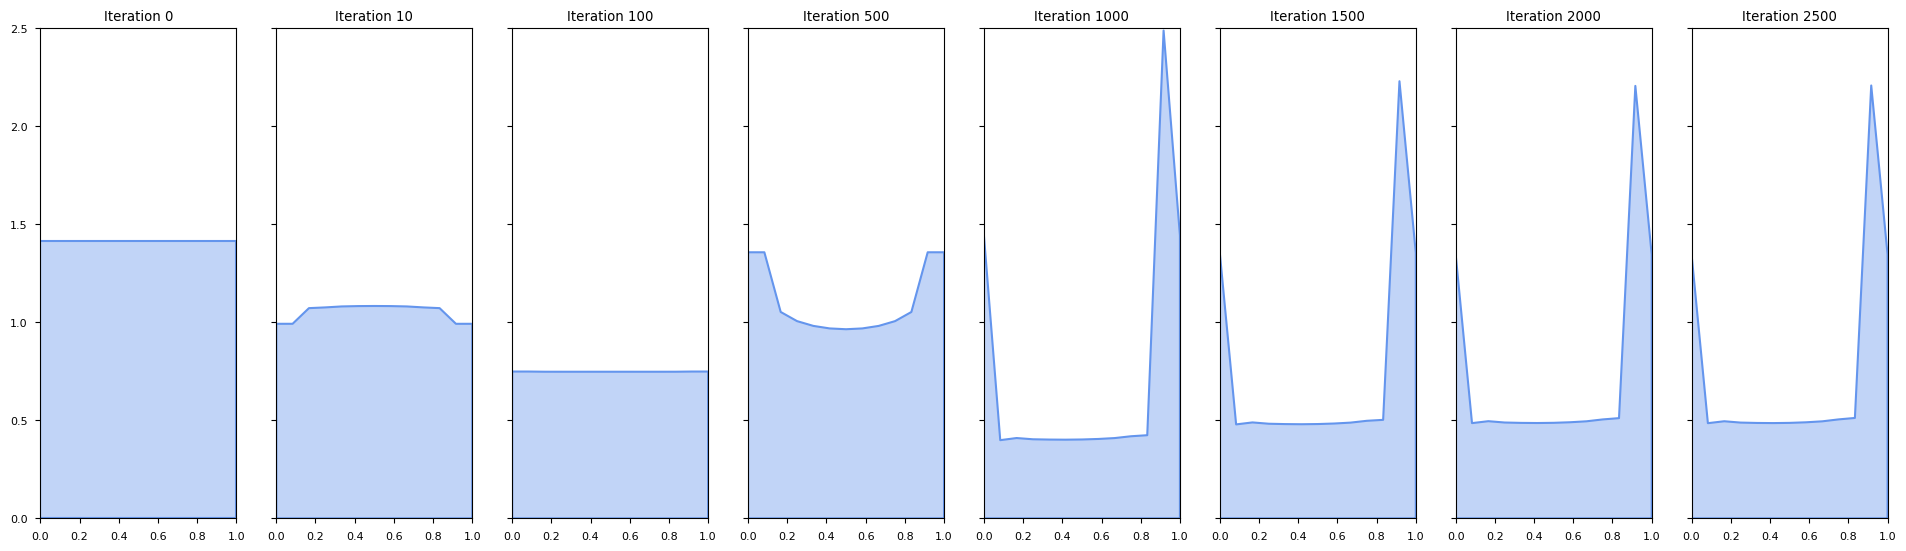


 Lagrangian variables:


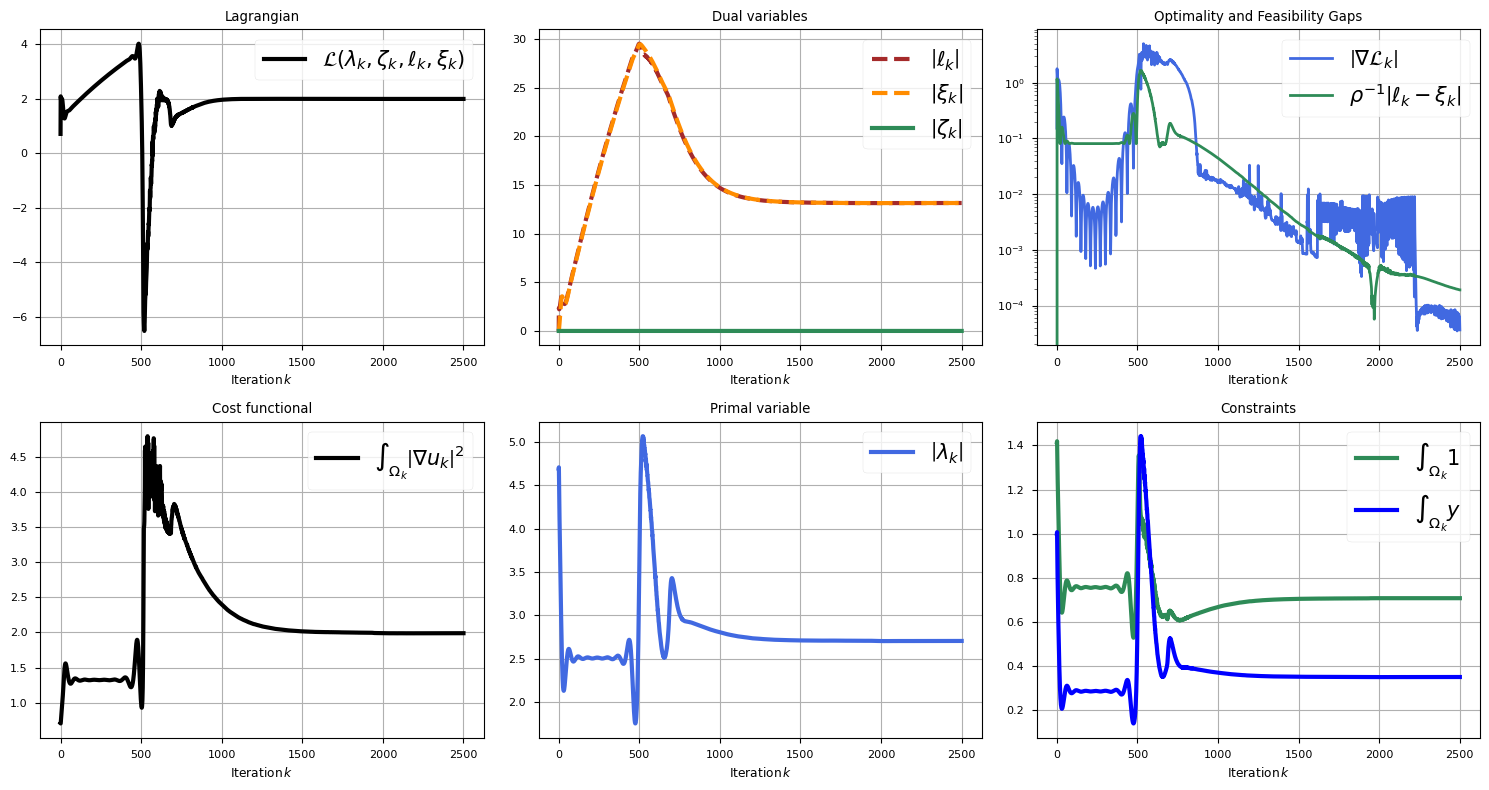

In [2]:
cw.test_plot("t00", 2.5, [0, 10, 100, 500, 1000, 1500, 2000, 2500])

### 7.2 Test t01
11 piecewise linear functions were used to parametrize the top boundary. 
1500 iterations were performed. The algorithm converged.
We used the following constraints:
$$
\int_{\Omega}1 dx= 1, \quad  \int_{\Omega}y dx= \frac{1}{2}(1)^2 + 0.2 = 0.7
$$

Initial values:
> area = 1.9999999999999944
> inty = 2.0000000000000027
Final values:
> area = 1.0000108569101325
> inty = 0.7000121090731874

 Domain along the iterations:


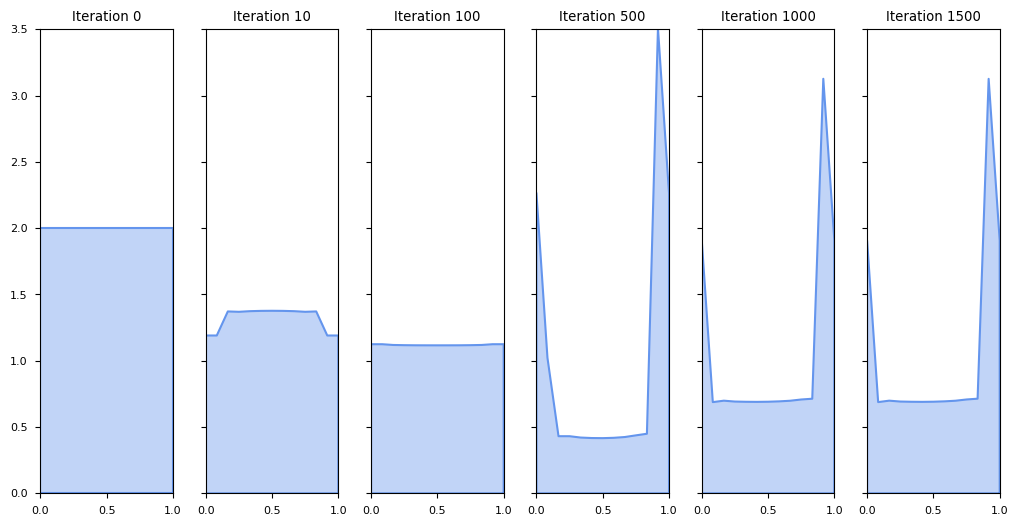


 Lagrangian variables:


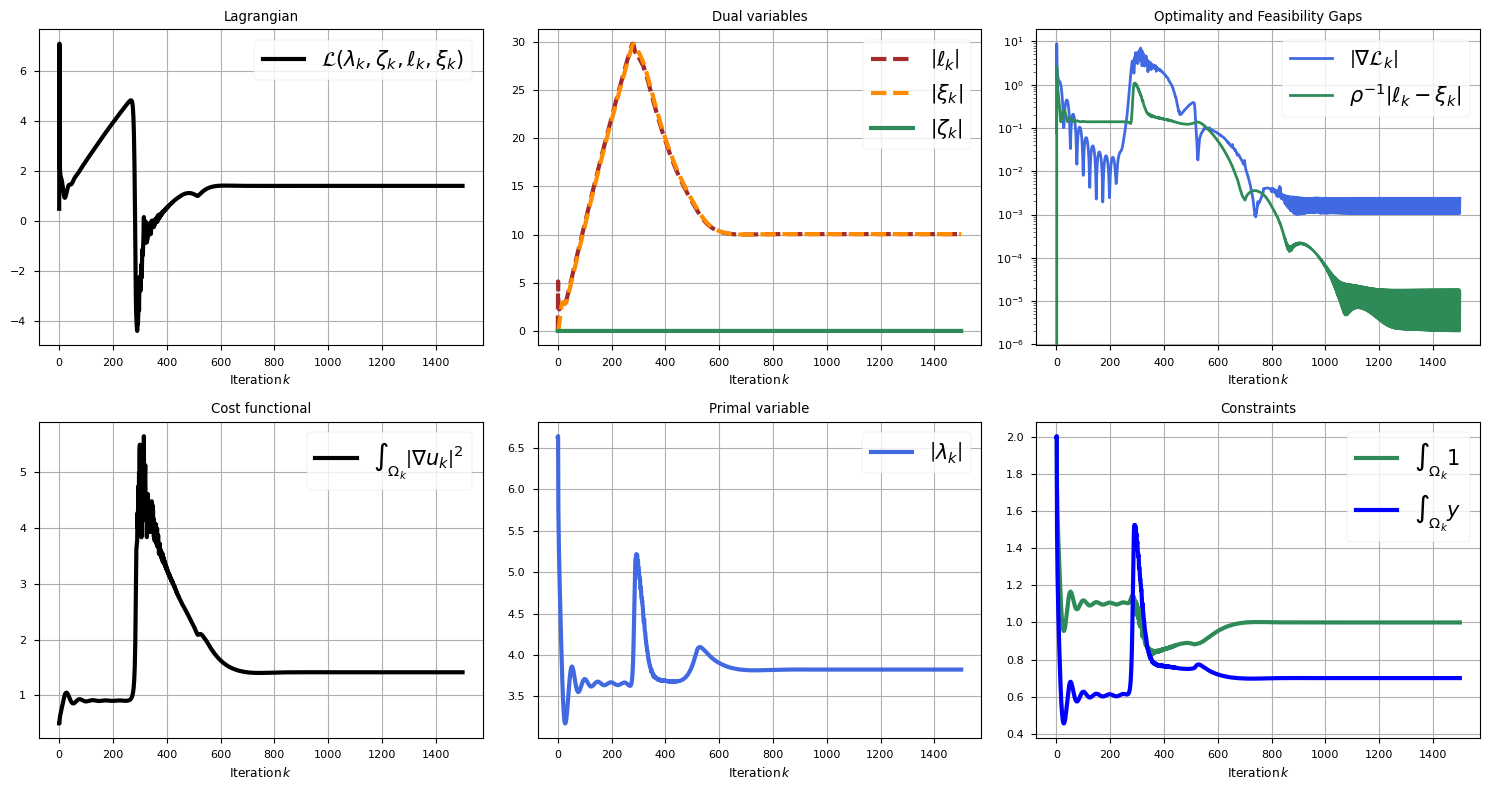

In [3]:
cw.test_plot("t01", 3.5, [0, 10, 100, 500, 1000, 1500])

### 7.3. Test t02

16 piecewise linear functions were used to parametrize the top boundary. 
2000 iterations were performed. The algorithm converged.
We used the following constraints:
$$
\int_{\Omega}1 dx= 1, \quad  \int_{\Omega}y dx= \frac{1}{2}(1)^2 + 0.2 = 0.7
$$

Initial values:
> area = 2.0000000000000004
> inty = 1.999999999999995
Final values:
> area = 1.0000904868890332
> inty = 0.6999267587303937

 Domain along the iterations:


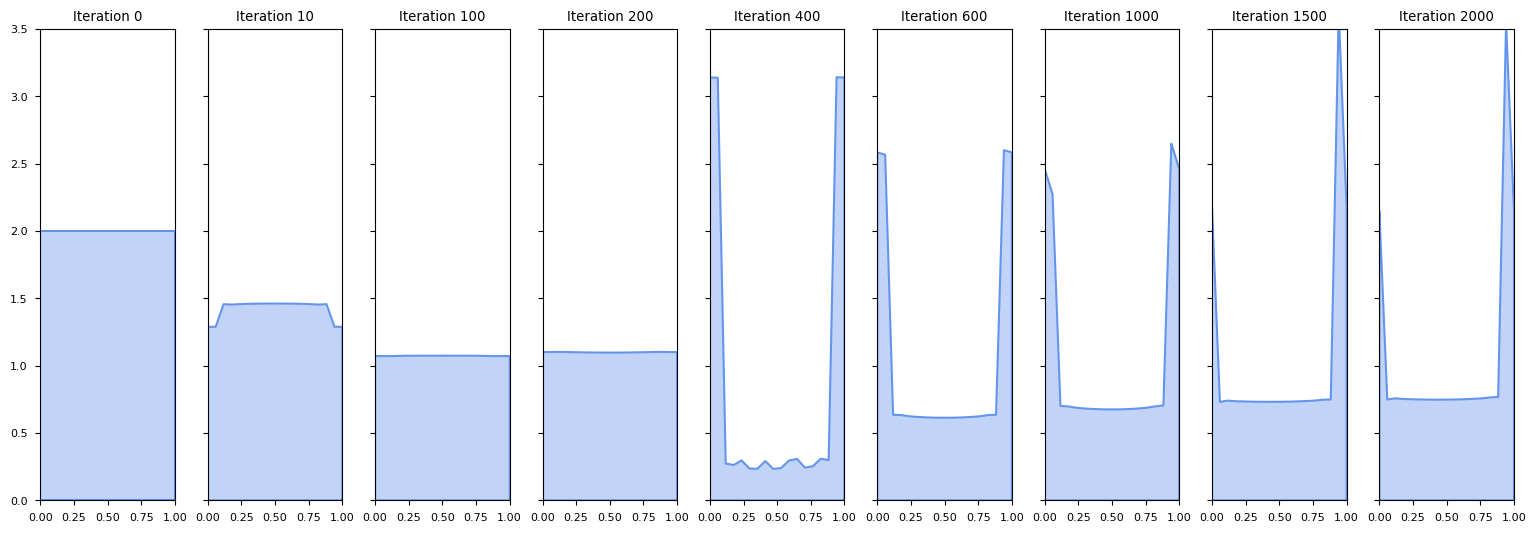


 Lagrangian variables:


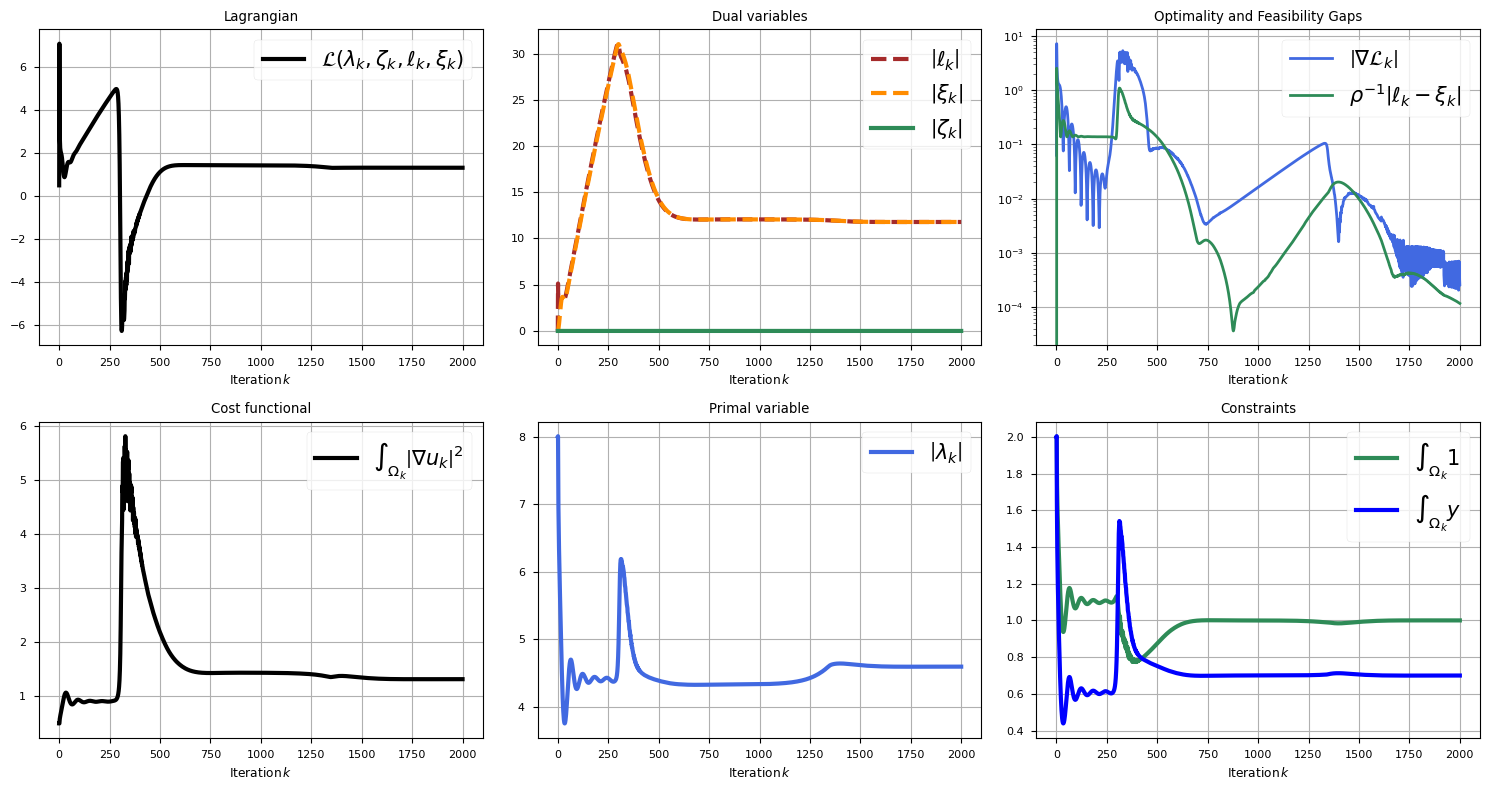

In [5]:
cw.test_plot("t02", 3.5, [0, 10, 100, 200, 400, 600, 1000, 1500, 2000])

### 7.4. Test t04

3 periodic **bounded** functions were used to parametrize the top boundary. 
4000 iterations were performed. 
We used the following constraints:
$$
\int_{\Omega}1 dx= \frac{1}{\sqrt{2}} \approx 0.7071, \quad  \int_{\Omega}y dx= \frac{1}{2}\left(\frac{1}{\sqrt{2}}\right)^2 + 0.1 = 0.35
$$

Initial values:
> area = 0.7701618417290765
> inty = 0.30235107065845945
Final values:
> area = 0.6690238185778465
> inty = 0.39038909801760124

 Domain along the iterations:


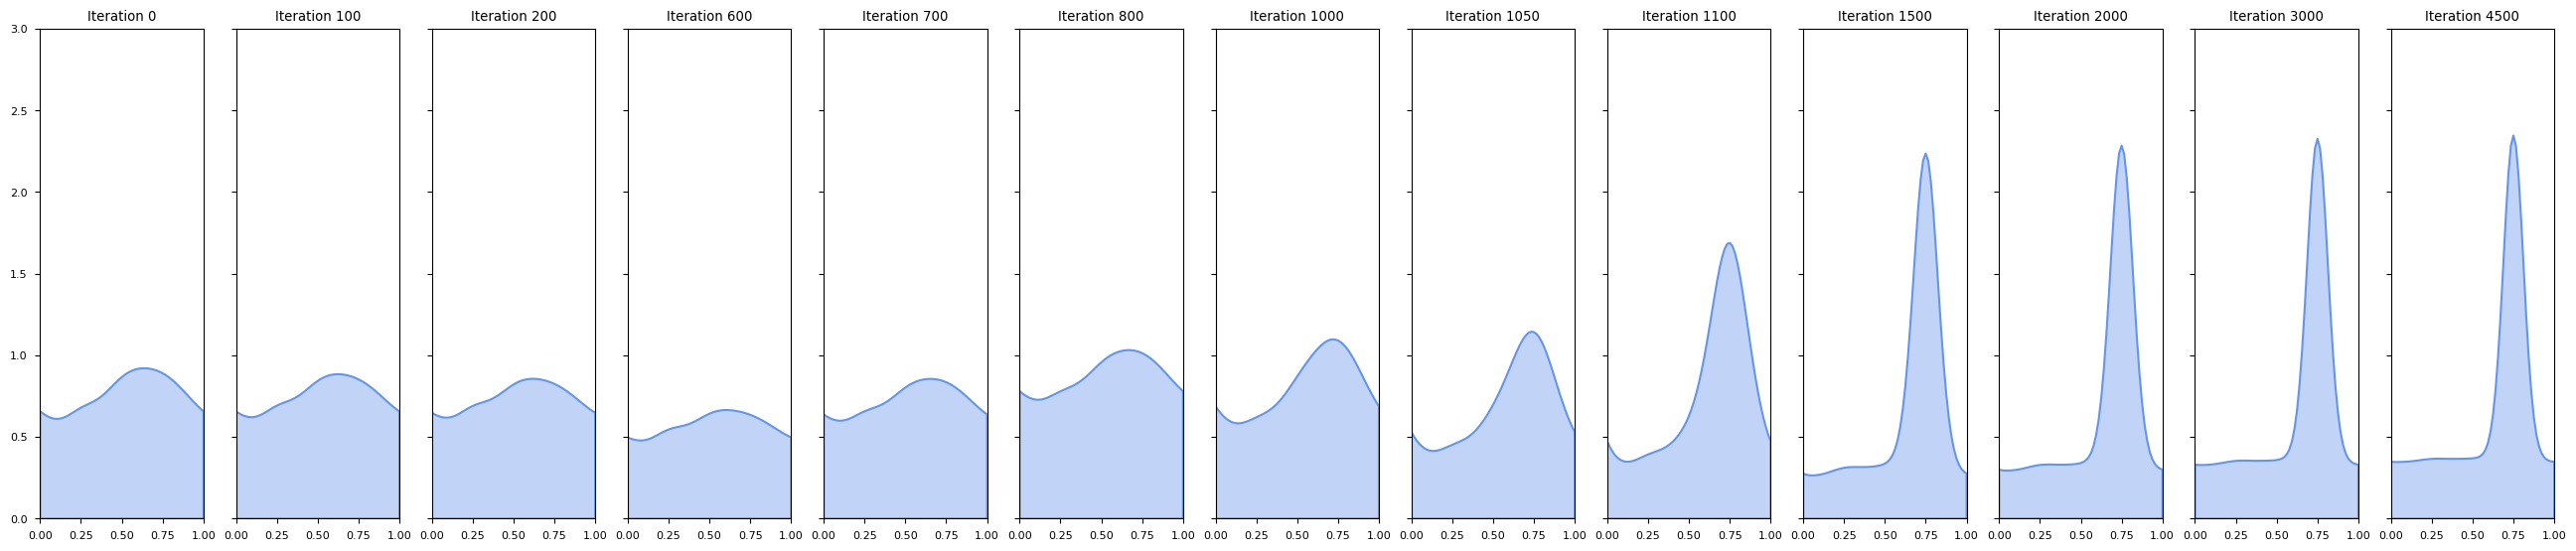


 Lagrangian variables:


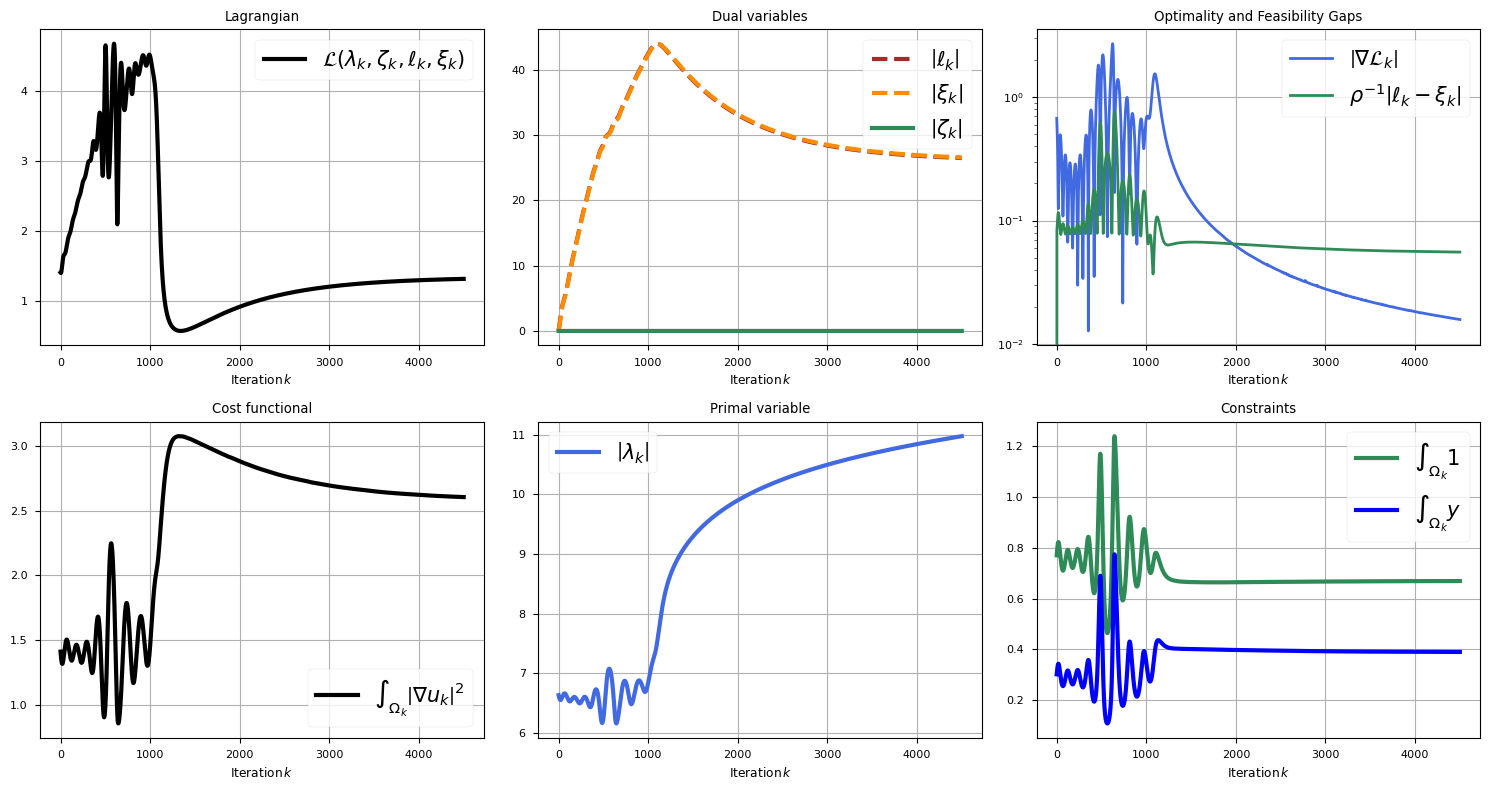

In [13]:
cw.test_plot("t04", 3.0, [0, 100, 200, 600, 700, 800, 1000, 1050, 1100, 1500, 2000, 3000, 4500])

## 8. Verification Test: Could the problem be ill-posed?    

We write a code to calculate the energy of domains with to top boundary represented by $(a,b,c)$-peak shape function of the form:


![](domain.png "")


preserving the values of the constraints
$$
\int_{\Omega}1 dx= c_0, \quad  \int_{\Omega}y dx= \frac{1}{2}\left(c_0\right)^2 + \varepsilon
$$

### 8.1. Test with $c_0 = 1/\sqrt{2}$ and $\varepsilon = 0.1$

In [5]:
import codewater as cw
import numpy as np
data = cw.peak_fun(1./np.sqrt(2), 0.1, 100)
a, b, c = data[np.argmin(data[:,-1]), :3]
print("The shape with the least energy is given by")
print("a=", a)
print("b=", b)
print("c=", c)

The shape with the least energy is given by
a= 42.01285654158988
b= 0.6999642884472894
c= 0.0003400146206286859


### 8.2. Test with $c_0 = 1$ and $\varepsilon = 0.2$

In [4]:
import codewater as cw
import numpy as np
data = cw.peak_fun(1, 0.2, 100)
a, b, c = data[np.argmin(data[:,-1]), :3]
print("The shape with the least energy is given by")
print("a=", a)
print("b=", b)
print("c=", c)

The shape with the least energy is given by
a= 59.41515151515179
b= 0.98989898989899
c= 0.0003400146206286839


**Comments:**

* <del>The convergence is very sensitive to the initial guess.</del>
    - We force the constraints by adding quadratic constraints in the Lagrangian functional. With this, a algorithm parameter $\eta=50$ works.
* <del>Due to problems with the underlying PDE solver, we are limited to approximately 650 iterations.</del>
    - The algorithm is reinitialized after 500 iterations.
* We have implemented other basis functions to parametrize the curve. <del>It is necessary to choose a good parameter in the definition of these functions. More tests must be performed.</del>